# Traffic Congestion Prediction Model Using Linear Regression 

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the csv

In [86]:
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


# filtering the data and converting all the Features into Numeric Values 

In [88]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].dt.hour
data['dayofthe_week'] = data['date_time'].dt.dayofweek
data['month']=data['date_time'].dt.month
data['is_weekend'] = data['dayofthe_week'].isin([5, 6]).astype(int)

In [89]:
data['c_temp'] = data['temp'] - 273

In [65]:
data['holiday'] = data['holiday'].fillna('none').astype(str).str.strip()
data['is_holiday'] = (data['holiday'] != 0 ).astype(int)

In [66]:
data['rain_1h'] = data['rain_1h'].clip(lower = 0)
data['snow_1h'] = data['snow_1h'].clip(lower = 0)
data['clouds_all'] = data['clouds_all'].clip(lower = 0 , upper = 100)
data.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'hour',
       'dayofthe_week', 'is_weekend', 'c_temp', 'is_holiday'],
      dtype='object')

In [67]:
data['weather_main'] = data['weather_main'].astype('category')
data = data.drop(columns =['weather_description'] )
data['weather_main'].cat.categories

Index(['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Smoke',
       'Snow', 'Squall', 'Thunderstorm'],
      dtype='object')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   holiday         48204 non-null  object        
 1   temp            48204 non-null  float64       
 2   rain_1h         48204 non-null  float64       
 3   snow_1h         48204 non-null  float64       
 4   clouds_all      48204 non-null  int64         
 5   weather_main    48204 non-null  category      
 6   date_time       48204 non-null  datetime64[ns]
 7   traffic_volume  48204 non-null  int64         
 8   hour            48204 non-null  int32         
 9   dayofthe_week   48204 non-null  int32         
 10  is_weekend      48204 non-null  int64         
 11  c_temp          48204 non-null  float64       
 12  is_holiday      48204 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(4), int32(2), int64(4), object(1)
memory usage: 4.1+ MB


In [69]:
data = data.dropna(subset=['holiday','rain_1h','snow_1h','clouds_all','weather_main','date_time','traffic_volume'])

In [70]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume,hour,dayofthe_week,is_weekend,c_temp,is_holiday
0,none,288.28,0.0,0.0,40,Clouds,2012-10-02 09:00:00,5545,9,1,0,15.28,1
1,none,289.36,0.0,0.0,75,Clouds,2012-10-02 10:00:00,4516,10,1,0,16.36,1
2,none,289.58,0.0,0.0,90,Clouds,2012-10-02 11:00:00,4767,11,1,0,16.58,1
3,none,290.13,0.0,0.0,90,Clouds,2012-10-02 12:00:00,5026,12,1,0,17.13,1
4,none,291.14,0.0,0.0,75,Clouds,2012-10-02 13:00:00,4918,13,1,0,18.14,1


In [12]:
model_data = data[['holiday','is_holiday','c_temp','hour','dayofthe_week','is_weekend','rain_1h','snow_1h','clouds_all','weather_main','traffic_volume']]

In [72]:
model_data.sample(10)

,holiday,is_holiday,c_temp,hour,dayofthe_week,is_weekend,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume
42608,none,1,-1.49,9,6,1,0.0,0.0,1,Clear,2788
4986,none,1,-0.20,1,3,0,0.0,0.0,90,Thunderstorm,330
20435,none,1,-2.41,3,2,0,0.0,0.0,90,Clouds,475
29213,none,1,-11.92,3,5,1,0.0,0.0,90,Mist,317
34608,none,1,27.34,15,5,1,0.0,0.0,75,Clouds,4516
45640,none,1,27.29,14,5,1,0.0,0.0,1,Clear,3992
36932,none,1,12.42,22,1,0,0.0,0.0,75,Clouds,1538
17464,none,1,16.98,21,0,0,0.0,0.0,90,Rain,2334
44855,none,1,21.22,13,6,1,0.0,0.0,90,Clouds,3888
21553,none,1,2.72,6,0,0,0.0,0.0,75,Clouds,5628


# Plotting the data 


In [73]:
import seaborn as sns 

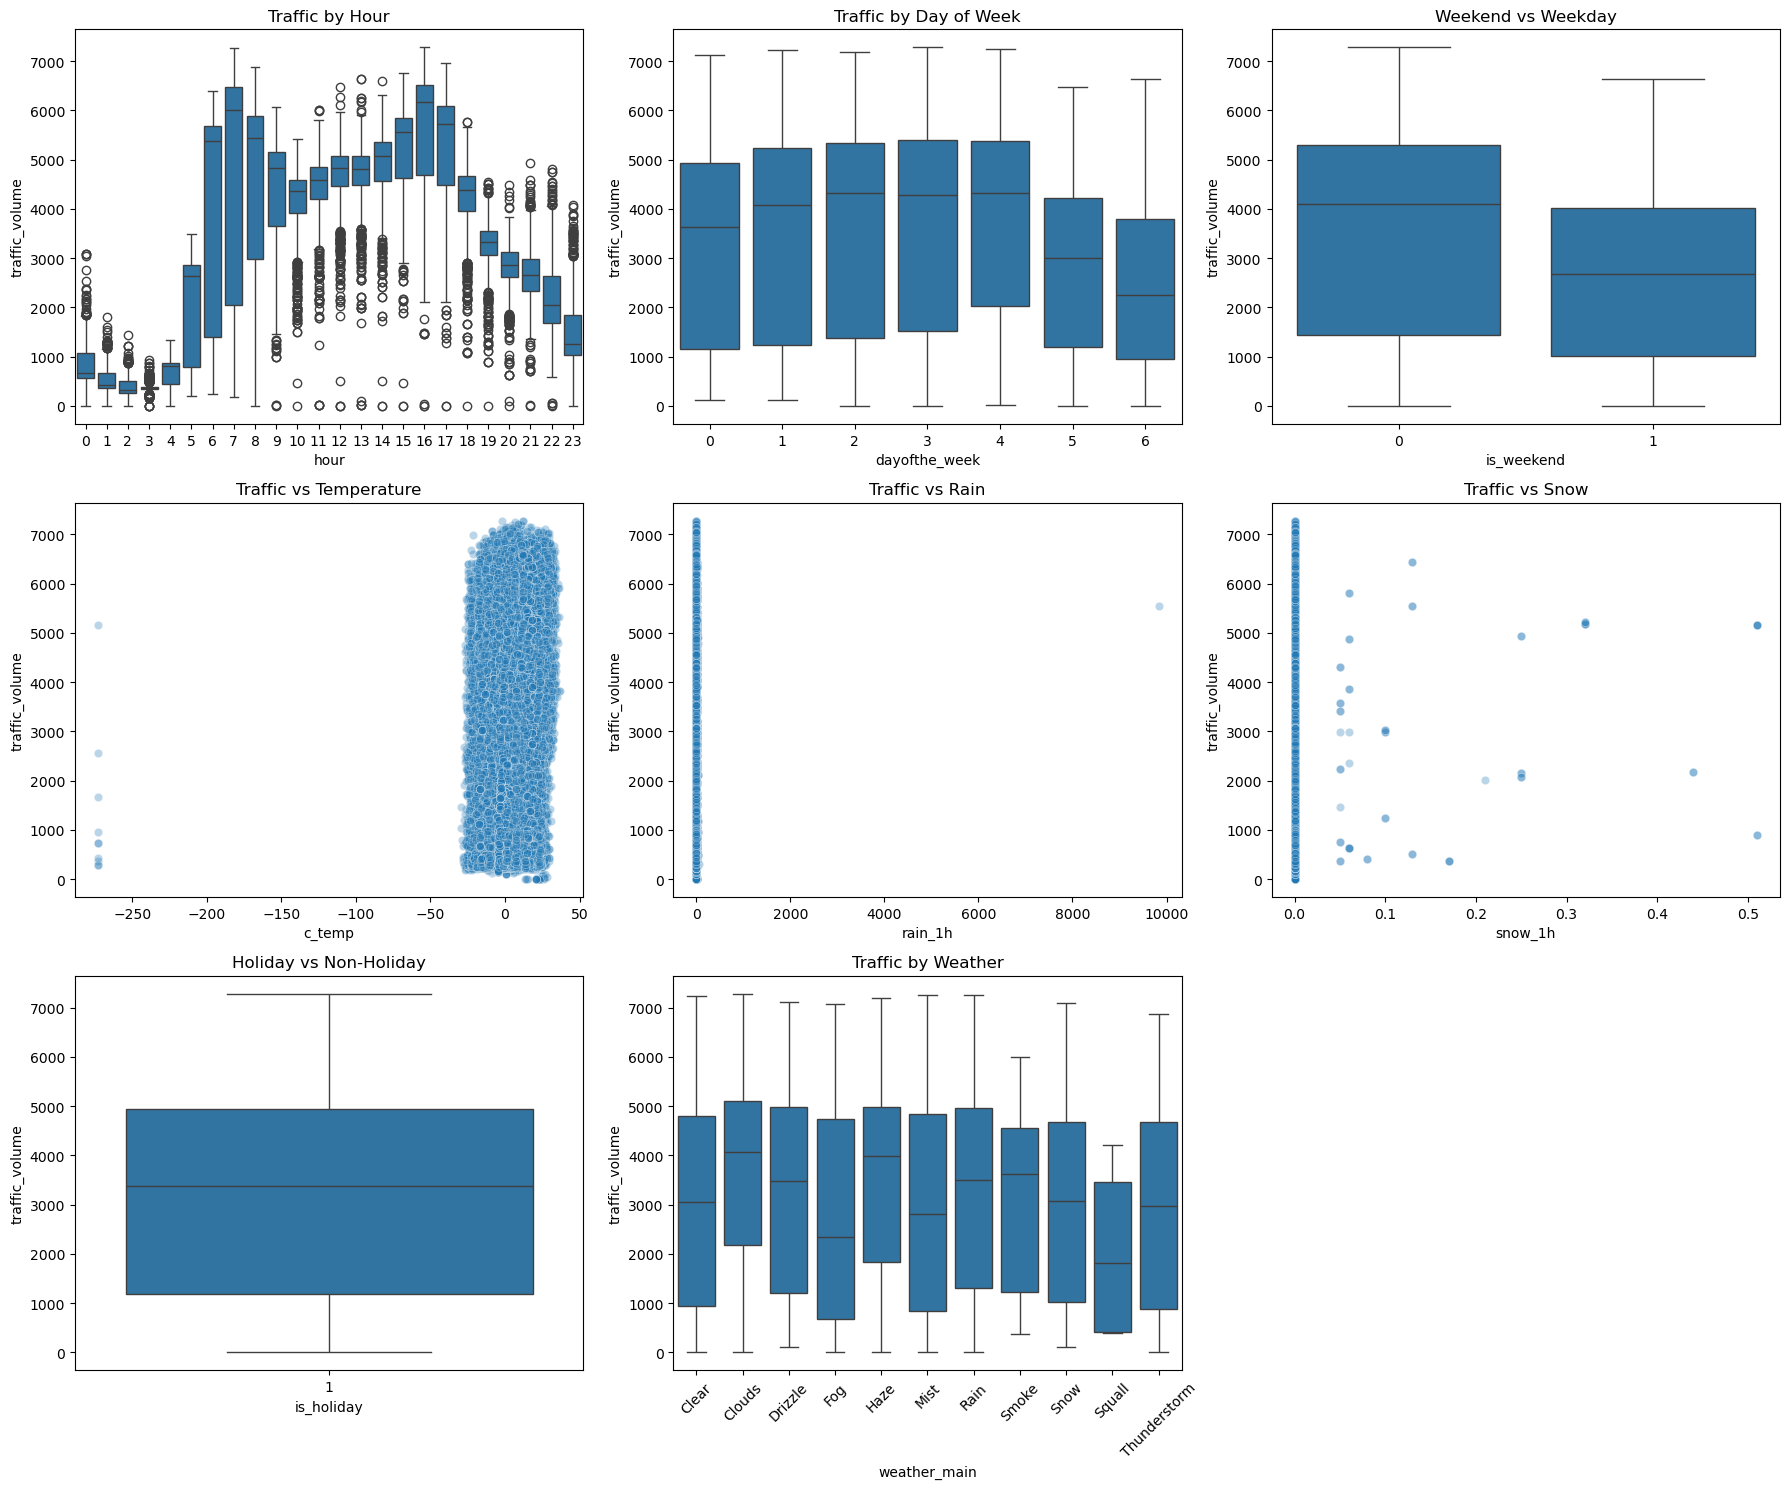

In [74]:

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Traffic by hour
sns.boxplot(x='hour', y='traffic_volume', data=model_data, ax=axes[0,0])
axes[0,0].set_title("Traffic by Hour")

# 2. Traffic by day of week
sns.boxplot(x='dayofthe_week', y='traffic_volume', data=model_data, ax=axes[0,1])
axes[0,1].set_title("Traffic by Day of Week")

# 3. Weekend vs Weekday
sns.boxplot(x='is_weekend', y='traffic_volume', data=model_data, ax=axes[0,2])
axes[0,2].set_title("Weekend vs Weekday")

# 4. Traffic vs Temperature
sns.scatterplot(x='c_temp', y='traffic_volume', data=model_data, alpha=0.3, ax=axes[1,0])
axes[1,0].set_title("Traffic vs Temperature")

# 5. Traffic vs Rain
sns.scatterplot(x='rain_1h', y='traffic_volume', data=model_data, alpha=0.3, ax=axes[1,1])
axes[1,1].set_title("Traffic vs Rain")

# 6. Traffic vs Snow
sns.scatterplot(x='snow_1h', y='traffic_volume', data=model_data, alpha=0.3, ax=axes[1,2])
axes[1,2].set_title("Traffic vs Snow")

# 7. Holiday vs Non-Holiday
sns.boxplot(x='is_holiday', y='traffic_volume', data=model_data, ax=axes[2,0])
axes[2,0].set_title("Holiday vs Non-Holiday")

# 8. Traffic by Weather Condition
sns.boxplot(x='weather_main', y='traffic_volume', data=model_data, ax=axes[2,1])
axes[2,1].set_title("Traffic by Weather")
axes[2,1].tick_params(axis='x', rotation=45)

# Remove empty subplot (bottom-right corner)
fig.delaxes(axes[2,2])

# Adjust spacing
plt.tight_layout()
plt.show()


# Divide Data set into Train and Split

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [76]:
features = ['is_holiday','c_temp','hour','dayofthe_week','is_weekend','rain_1h','snow_1h','clouds_all']
x = data[features]

y = model_data['traffic_volume']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)   

In [77]:
x

,is_holiday,c_temp,hour,dayofthe_week,is_weekend,rain_1h,snow_1h,clouds_all
0,1,15.28,9,1,0,0.0,0.0,40
1,1,16.36,10,1,0,0.0,0.0,75
2,1,16.58,11,1,0,0.0,0.0,90
3,1,17.13,12,1,0,0.0,0.0,90
4,1,18.14,13,1,0,0.0,0.0,75
...,...,...,...,...,...,...,...,...
48199,1,10.45,19,6,1,0.0,0.0,75
48200,1,9.76,20,6,1,0.0,0.0,90
48201,1,9.73,21,6,1,0.0,0.0,90
48202,1,9.09,22,6,1,0.0,0.0,90


# testing using Linear Regression Model 

In [78]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [79]:
y_pred = model.predict(x_test)

In [80]:
results1 = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_pred
})

results1.sample(10)

,Actual,Predicted
40462,4348,3296.007636
6993,565,1633.517846
29880,602,2459.718513
30040,4467,2235.195564
27256,4684,3267.840935
28936,2547,4285.285602
28751,6181,3223.937579
40034,303,1721.656978
18661,258,2720.071708
20950,2862,2711.510954


# Checking the Accuracy of the Model 

In [81]:
#r2 Score 
r2 = r2_score(y_test,y_pred)
print(r2)
# MAE 
mae = mean_absolute_error(y_test,y_pred) 
print(mae)
# MSE
mse = mean_squared_error(y_test,y_pred)
print(mse)
# RMSE
rmse = np.sqrt(mse)
print(rmse)

-9.448088872403478
1639.3003330999852
40960369.79164629
6400.028889907161
